## Neural Networks for Music Instrument Classification

In this project, we will attempt a musical instrument classification problem. Given a sample of non-western music, we want to determine which instrument is playing

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
!pip install librosa

In [ ]:
import librosa
import zipfile
import os,fnmatch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/beijing_opera_percussion_instrument_1.0/'

/content/drive/MyDrive/Colab Notebooks/beijing_opera_percussion_instrument_1.0


In [ ]:
wav_files = [file for file in os.listdir('.') if file.endswith('.wav')]
folder_path = '/content/drive/MyDrive/Colab Notebooks/beijing_opera_percussion_instrument_1.0/'
print("Number of WAV Files:", len(wav_files))

Number of WAV Files: 236


In [ ]:
audio_data = []
sampling_rate = []


max_length = max(librosa.get_duration(filename=os.path.join(folder_path, file)) for file in wav_files)

for wav_file in wav_files:
    filename = os.path.join(folder_path, wav_file)
    y, sr = librosa.load(filename)

    padded_y = librosa.util.fix_length(y, size = int(max_length * sr))  # just making all the audios of the same length
    audio_data.append(padded_y)
    sampling_rate.append(sr)

<ipython-input-7-45b24cb86b30>:5: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  max_length = max(librosa.get_duration(filename=os.path.join(folder_path, file)) for file in wav_files)


Here we try to convert the wav data into computer readable format using librosa

In [ ]:
audio_data_array = np.vstack(audio_data)
sampling_rate_array = np.array(sampling_rate)
print(audio_data_array.shape)

(236, 197120)


In [ ]:
from sklearn.preprocessing import StandardScaler

mfccs = np.array([librosa.feature.mfcc(y=audio, sr=sr) for audio, sr in zip(audio_data_array, sampling_rate)])

print(mfccs.shape) #original format is not readable for sequential Neural Network so
mfccs_stacked = np.stack(mfccs, axis=-1)
mfccs_2d = mfccs.reshape((mfccs.shape[0], -1))  #reshape to 2D
scaler = StandardScaler()
mfccs_normalized = scaler.fit_transform(mfccs_2d)


(236, 20, 386)


In [ ]:
print(mfccs.shape)
print(mfccs_2d.shape)

(236, 20, 386)
(236, 7720)


here the data is transformed into mfcc data in 2D

In [ ]:
print(mfccs_2d.shape)

(236, 7720)


Below I matched the wav file to its classification.

In [ ]:
import pandas as pd

# Load metadata file
metadata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/classification_metadata.csv')

# Path to the folder containing your audio files
audio_folder = '/content/drive/MyDrive/Colab Notebooks/beijing_opera_percussion_instrument_1.0/'

# Initialize empty lists to store features and labels
features = []
labels = []

# Iterate through each row in the metadata
for index, row in metadata.iterrows():
    # Construct the full path to the audio file
    audio_path = audio_folder + row['filename']

    # Load audio file using librosa
    y, sr = librosa.load(audio_path, sr=None)

    # Extract features (you may need to customize this based on your needs)
    # For example, extracting mel-frequency cepstral coefficients (MFCCs)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    # Flatten the MFCCs to a 1D array (you might want to use other features)
    #flat_mfccs = np.ravel(mfccs)

    # Append features and label to the lists
    features.append(mfccs.T)
    labels.append(row['label'])



In [ ]:
# Convert lists to numpy arrays
X = np.array(features)
y = np.array(labels)

print(mfccs.shape)
print(X.shape)
print(mfccs_2d.shape)
print(y)
print(y.shape)

(13, 103)
(236,)
(236, 7720)
['daluo' 'bangu' 'xiaoluo' 'naobo' 'xiaoluo' 'daluo' 'bangu' 'bangu'
 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu'
 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu'
 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu'
 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu'
 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu'
 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu'
 'bangu' 'bangu' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo'
 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo'
 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo'
 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo'
 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo'
 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'naobo' 'naobo' 'naobo' 'naobo'
 'naobo' 'naobo' 'naobo' '

<ipython-input-34-c33ddba417fa>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(features)


In [ ]:
pip install tensorflow_io

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 20.1 MB/s eta 0:00:00


In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense

try to process the data

In [ ]:
# Checking the Data
#print(X)
print(X.shape)
#print(y)
print(y.shape)

(236,)
(236,)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Example string labels
string_labels = ["daluo", "bangu", "xiaoluo", "naobo"]

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the string labels to numerical labels
y_numerical_labels = label_encoder.fit_transform(y)

# Print the result
print("String labels:", string_labels)
print("Numerical labels:", y_numerical_labels)


# Access the mapping between original string labels and numerical labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:", label_mapping)

print("Numerical Labels Shape:",y_numerical_labels.shape)


String labels: ['daluo', 'bangu', 'xiaoluo', 'naobo']
Numerical labels: [1 0 3 2 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Label mapping: {'bangu': 0, 'daluo': 1, 'naobo': 2, 'xiaoluo': 3}
Numerical Labels Shape: (236,)


There are 236 entries, so the data seems to be right. In each entry, there are its corresponding MFCCs in X and label in y.

In [ ]:
from sklearn.model_selection import train_test_split

# load features (X) and labels (y) from the previous steps

# Split the data into training (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(mfccs_2d, y_numerical_labels, test_size=0.3, random_state=42)

# Split the temporary data into validation (50%) and test (50%)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print(f"Training set size: {len(X_train)} samples")
# print(f"Validation set size: {len(X_val)} samples")
print(f"Test set size: {len(X_test)} samples")


Training set size: 165 samples
Test set size: 71 samples


In [ ]:
from sklearn.preprocessing import StandardScaler;

# Scale the training and test matrices
scaler = StandardScaler();
scaler.fit(X_train);
Xtr_scale = scaler.transform(X_train);
Xts_scale = scaler.transform(X_test);

from tensorflow.keras.utils import to_categorical;
ytr = to_categorical(y_train, 4);
yts = to_categorical(y_test, 4);

print(ytr.shape);

(165, 4)


# Build the Network

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import librosa
import librosa.display
import librosa.feature

try to play the sample

In [ ]:
wav_file = '/content/drive/MyDrive/Colab Notebooks/beijing_opera_percussion_instrument_1.0/205972__ajaysm__daluo-01.wav'

import IPython.display as ipd
ipd.Audio(wav_file)

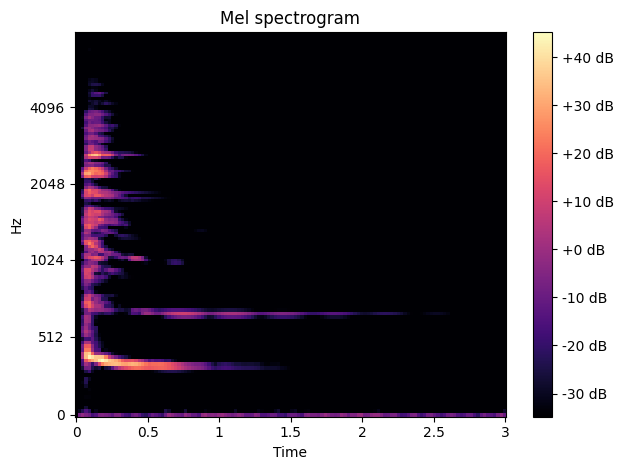

In [ ]:
y, sr = librosa.load(wav_file)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
librosa.display.specshow(librosa.amplitude_to_db(S),
                         y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [ ]:
# construct the model, print model summary, and compile the model
import tensorflow as tf;
from tensorflow.keras.models import Model, Sequential;
from tensorflow.keras.layers import Dense, Activation;

import tensorflow.keras.backend as K
K.clear_session();

def createModel():
  model = Sequential();

  model.add(Dense(units = 256, # number of neurons in the hidden layer
                  input_shape = (7720,),
                  activation = 'sigmoid',
                  name = 'hidden'));

  model.add(Dense(units = 4,
                  activation = 'softmax',
                  name = 'output'));
  return model;

model = createModel();

from tensorflow.keras import optimizers;
opt = optimizers.Adam(learning_rate = 0.001);

print(model.summary());

model.compile(optimizer = opt,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']);


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 256)               1976576   
                                                                 
 output (Dense)              (None, 4)                 1028      
                                                                 
Total params: 1977604 (7.54 MB)
Trainable params: 1977604 (7.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# fit the model
#X_train_tf = tf.convert_to_tensor(X_train_normalized, dtype=tf.float32)
#y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.int32)

#print(X_train_tf.shape)


# X_train_flattened = np.concatenate(X_train)
# X_train_tf = tf.convert_to_tensor(X_train_flattened, dtype=tf.float32)


# print(X_train_tf.shape)
# print(y_train.shape)


# # Flatten the nested arrays in y_train
# y_train_flattened = np.asarray(y_train)
# y_train_tf = tf.convert_to_tensor(y_train_flattened, dtype=tf.int32)

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


# Assuming y_train is your original label array
y_train_numerical = label_encoder.fit_transform(y_train)
y_train_one_hot = to_categorical(y_train_numerical, num_classes=4)

y_test_numerical = label_encoder.fit_transform(y_test)
y_test_one_hot = to_categorical(y_test_numerical, num_classes=4)



hist = model.fit(x = X_train,
                 y = y_train_one_hot,
                 epochs = 10,
                 batch_size = 128,
                 validation_data = (X_test, y_test_one_hot))

Epoch 1/10
2/2 [==============================] - 2s 504ms/step - loss: 1.4272 - accuracy: 0.2667 - val_loss: 1.4747 - val_accuracy: 0.1972
Epoch 2/10
2/2 [==============================] - 0s 104ms/step - loss: 1.4126 - accuracy: 0.2727 - val_loss: 1.4148 - val_accuracy: 0.2113
Epoch 3/10
2/2 [==============================] - 0s 107ms/step - loss: 1.3933 - accuracy: 0.2667 - val_loss: 1.3910 - val_accuracy: 0.2394
Epoch 4/10
2/2 [==============================] - 0s 272ms/step - loss: 1.4015 - accuracy: 0.2545 - val_loss: 1.3797 - val_accuracy: 0.2676
Epoch 5/10
2/2 [==============================] - 0s 197ms/step - loss: 1.3928 - accuracy: 0.2606 - val_loss: 1.3814 - val_accuracy: 0.2676
Epoch 6/10
2/2 [==============================] - 0s 98ms/step - loss: 1.3879 - accuracy: 0.2727 - val_loss: 1.3777 - val_accuracy: 0.3099
Epoch 7/10
2/2 [==============================] - 0s 120ms/step - loss: 1.3835 - accuracy: 0.2667 - val_loss: 1.3816 - val_accuracy: 0.3099
Epoch 8/10
2/2 [=====

The Neural Network has trained. Perhaps we can make it better?

In [ ]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_train_one_hot.shape)
print(y_test_one_hot.shape)
print(y_test.shape)

(165, 7720)
(71, 7720)
(165,)
(165, 4)
(71, 4)
(71,)


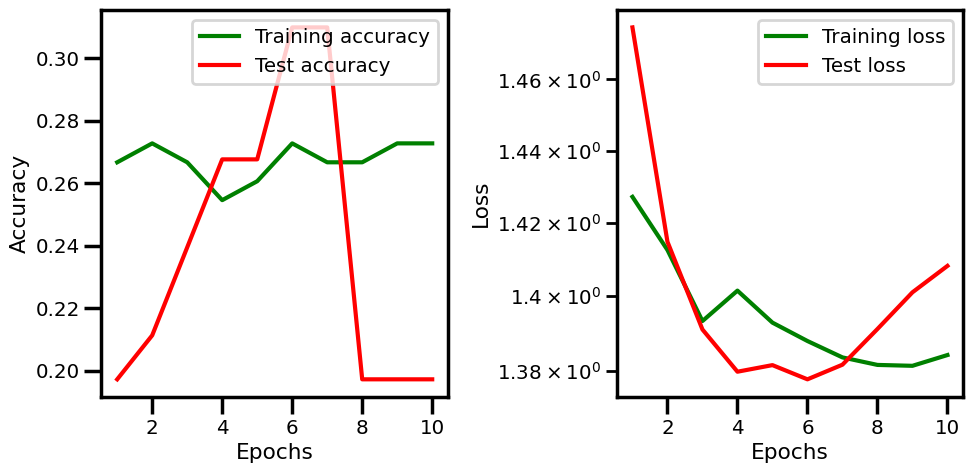

In [ ]:
# two subplots: one of accuracy vs. epochs, one of loss vs. epochs
# in each subplot, show training in one color and test in another color

trainAcc  = hist.history['accuracy'];
testAcc   = hist.history['val_accuracy'];
trainLoss = hist.history['loss'];
testLoss  = hist.history['val_loss'];
nEpochs   = len(trainAcc);

plt.figure(figsize = (10,5));
sns.set_context("poster", font_scale = .65, rc={"grid.linewidth": 0.6})

# Accuracy Plot
plt.subplot(1,2,1);

sns.lineplot(x     = np.arange(1,nEpochs+1),
             y     = trainAcc,
             label = 'Training accuracy',
             color = 'green');

sns.lineplot(x     = np.arange(1,nEpochs+1),
             y     = testAcc,
             label = 'Test accuracy',
             color = 'red');

plt.xlabel('Epochs');
plt.ylabel('Accuracy');

# Loss Plot
plt.subplot(1,2,2)

sns.lineplot(x     = np.arange(1,nEpochs+1),
             y     = trainLoss,
             label = 'Training loss',
             color = 'green');

sns.lineplot(x     = np.arange(1,nEpochs+1),
             y     = testLoss,
             label = 'Test loss',
             color = 'red');

plt.yscale('log');
plt.xlabel('Epochs');
plt.ylabel('Loss');
plt.tight_layout();


In [ ]:
rates = [0.1, 0.01, 0.001, 0.0001];

lrTrainAccDict  = {};
lrTestAccDict   = {};
lrTrainLossDict = {};
lrTestLossDict  = {};

for lRate in rates:

        K.clear_session();

        model = createModel();

        opt = optimizers.Adam(lr = lRate);

        model.compile(optimizer = opt,
                      loss = 'categorical_crossentropy',
                      metrics = ['accuracy']);

        hist = model.fit(x = Xtr_scale,
                         y = ytr,
                         epochs = 20,
                         batch_size = 128,
                         validation_data = (Xts_scale, yts));

        trainAcc  = hist.history['accuracy'];
        testAcc   = hist.history['val_accuracy'];
        trainLoss = hist.history['loss'];
        testLoss  = hist.history['val_loss'];

        lrTrainAccDict[lRate]  = trainAcc;
        lrTestAccDict[lRate]   = testAcc;
        lrTrainLossDict[lRate] = trainLoss;
        lrTestLossDict[lRate]  = testLoss;



Epoch 1/20
2/2 [==============================] - 2s 470ms/step - loss: 1.8194 - accuracy: 0.2545 - val_loss: 2.1948 - val_accuracy: 0.2113
Epoch 2/20
2/2 [==============================] - 0s 146ms/step - loss: 1.5329 - accuracy: 0.4121 - val_loss: 1.5334 - val_accuracy: 0.3380
Epoch 3/20
2/2 [==============================] - 0s 106ms/step - loss: 1.1502 - accuracy: 0.4606 - val_loss: 1.5098 - val_accuracy: 0.3099
Epoch 4/20
2/2 [==============================] - 0s 101ms/step - loss: 1.0857 - accuracy: 0.5091 - val_loss: 1.5807 - val_accuracy: 0.2535
Epoch 5/20
2/2 [==============================] - 0s 149ms/step - loss: 0.9347 - accuracy: 0.6545 - val_loss: 1.7544 - val_accuracy: 0.2394
Epoch 6/20
2/2 [==============================] - 0s 155ms/step - loss: 0.9546 - accuracy: 0.6667 - val_loss: 1.7701 - val_accuracy: 0.2394
Epoch 7/20
2/2 [==============================] - 0s 125ms/step - loss: 0.8938 - accuracy: 0.6364 - val_loss: 1.6272 - val_accuracy: 0.1549
Epoch 8/20
2/2 [====

Epoch 1/20
2/2 [==============================] - 2s 1s/step - loss: 1.9166 - accuracy: 0.2242 - val_loss: 2.0324 - val_accuracy: 0.2676
Epoch 2/20
2/2 [==============================] - 0s 248ms/step - loss: 1.4912 - accuracy: 0.4364 - val_loss: 1.7298 - val_accuracy: 0.2958
Epoch 3/20
2/2 [==============================] - 0s 182ms/step - loss: 1.2971 - accuracy: 0.4667 - val_loss: 1.6035 - val_accuracy: 0.2394
Epoch 4/20
2/2 [==============================] - 0s 214ms/step - loss: 1.0642 - accuracy: 0.5576 - val_loss: 1.5979 - val_accuracy: 0.2535
Epoch 5/20
2/2 [==============================] - 0s 209ms/step - loss: 0.9268 - accuracy: 0.6545 - val_loss: 1.7672 - val_accuracy: 0.2817
Epoch 6/20
2/2 [==============================] - 1s 334ms/step - loss: 0.9709 - accuracy: 0.5879 - val_loss: 1.6190 - val_accuracy: 0.2394
Epoch 7/20
2/2 [==============================] - 1s 399ms/step - loss: 0.7914 - accuracy: 0.7212 - val_loss: 1.6148 - val_accuracy: 0.3099
Epoch 8/20
2/2 [=======

Epoch 1/20
2/2 [==============================] - 3s 681ms/step - loss: 1.7515 - accuracy: 0.2364 - val_loss: 1.8587 - val_accuracy: 0.2676
Epoch 2/20
2/2 [==============================] - 0s 179ms/step - loss: 1.3721 - accuracy: 0.4606 - val_loss: 1.8901 - val_accuracy: 0.2958
Epoch 3/20
2/2 [==============================] - 0s 246ms/step - loss: 1.2880 - accuracy: 0.4606 - val_loss: 1.8924 - val_accuracy: 0.2113
Epoch 4/20
2/2 [==============================] - 0s 278ms/step - loss: 1.1453 - accuracy: 0.5212 - val_loss: 1.7778 - val_accuracy: 0.3239
Epoch 5/20
2/2 [==============================] - 0s 235ms/step - loss: 1.0280 - accuracy: 0.5879 - val_loss: 1.7117 - val_accuracy: 0.2254
Epoch 6/20
2/2 [==============================] - 0s 160ms/step - loss: 0.9019 - accuracy: 0.6303 - val_loss: 1.7248 - val_accuracy: 0.2254
Epoch 7/20
2/2 [==============================] - 0s 236ms/step - loss: 0.8519 - accuracy: 0.6606 - val_loss: 1.7366 - val_accuracy: 0.3099
Epoch 8/20
2/2 [====

Epoch 1/20
2/2 [==============================] - 4s 691ms/step - loss: 1.7374 - accuracy: 0.2303 - val_loss: 1.8610 - val_accuracy: 0.2394
Epoch 2/20
2/2 [==============================] - 0s 130ms/step - loss: 1.4414 - accuracy: 0.4364 - val_loss: 1.8338 - val_accuracy: 0.2817
Epoch 3/20
2/2 [==============================] - 0s 127ms/step - loss: 1.2703 - accuracy: 0.4909 - val_loss: 1.7821 - val_accuracy: 0.3380
Epoch 4/20
2/2 [==============================] - 0s 155ms/step - loss: 1.0569 - accuracy: 0.5576 - val_loss: 1.8034 - val_accuracy: 0.3239
Epoch 5/20
2/2 [==============================] - 0s 106ms/step - loss: 0.9891 - accuracy: 0.5455 - val_loss: 1.6816 - val_accuracy: 0.2817
Epoch 6/20
2/2 [==============================] - 0s 110ms/step - loss: 0.8708 - accuracy: 0.6242 - val_loss: 1.6183 - val_accuracy: 0.3380
Epoch 7/20
2/2 [==============================] - 0s 180ms/step - loss: 0.8362 - accuracy: 0.6424 - val_loss: 1.5698 - val_accuracy: 0.3521
Epoch 8/20
2/2 [====

training with different learning rates.

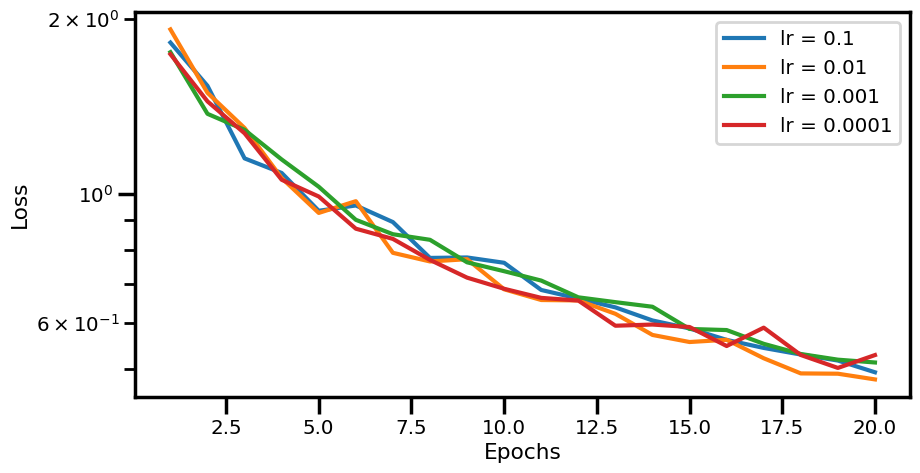

In [ ]:
# training loss vs. epoch
plt.figure(figsize = (10,5));
sns.set_context("poster", font_scale = .65, rc={"grid.linewidth": 0.6})

nEpochs = 20;

sns.lineplot(x     = np.arange(1,nEpochs+1),
             y     = lrTrainLossDict[rates[0]],
             label = 'lr = ' + str(rates[0]));

sns.lineplot(x     = np.arange(1,nEpochs+1),
             y     = lrTrainLossDict[rates[1]],
             label = 'lr = ' + str(rates[1]));

sns.lineplot(x     = np.arange(1,nEpochs+1),
             y     = lrTrainLossDict[rates[2]],
             label = 'lr = ' + str(rates[2]));

sns.lineplot(x     = np.arange(1,nEpochs+1),
             y     = lrTrainLossDict[rates[3]],
             label = 'lr = ' + str(rates[3]));

plt.yscale('log');
plt.xlabel('Epochs');
plt.ylabel('Loss');
#plt.tight_layout();


Approach 2 - Using Transfer Learning + CNN

In [ ]:
#Extract mel spectrograms as features for each audio file
import pandas as pd
import librosa
import numpy as np

# Load metadata file
metadata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/classification_metadata.csv')

# Path to the folder containing your audio files
audio_folder = '/content/drive/MyDrive/Colab Notebooks/beijing_opera_percussion_instrument_1.0/'

# Initialize empty lists to store features and labels
features = []
labels = []

# Iterate through each row in the metadata
for index, row in metadata.iterrows():
    # Construct the full path to the audio file
    audio_path = audio_folder + row['filename']

    # Load audio file using librosa
    y, sr = librosa.load(audio_path, sr=None)

    # Extract Mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
    #log - Taking the logarithm compresses this range, making it easier for a model to learn relevant patterns.

    # Append features and label
    features.append(log_mel_spectrogram.T)  # Transpose to have time along the rows
    labels.append(row['label'])

In [ ]:
y = np.array(labels)
print(y)
print(y.shape)

['daluo' 'bangu' 'xiaoluo' 'naobo' 'xiaoluo' 'daluo' 'bangu' 'bangu'
 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu'
 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu'
 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu'
 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu'
 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu'
 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu'
 'bangu' 'bangu' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo'
 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo'
 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo'
 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo'
 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo'
 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'naobo' 'naobo' 'naobo' 'naobo'
 'naobo' 'naobo' 'naobo' 'naobo' 'naobo' 'naobo' 'naobo

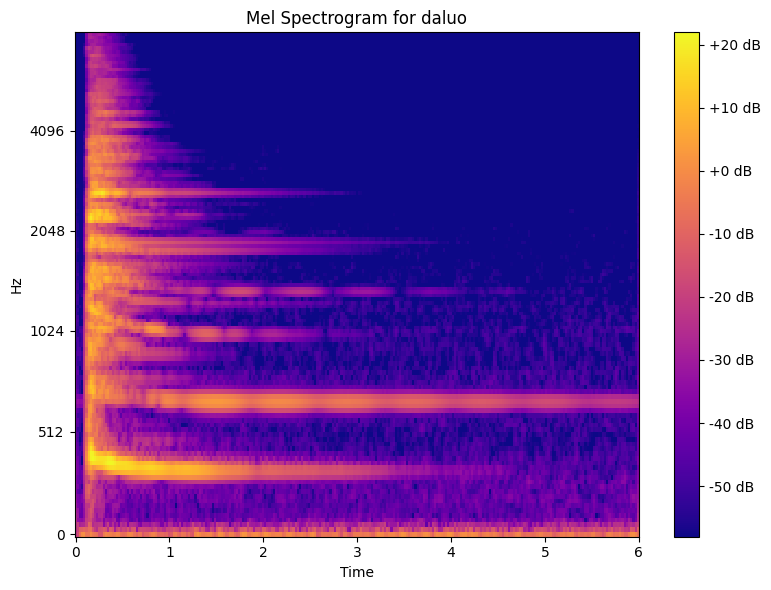

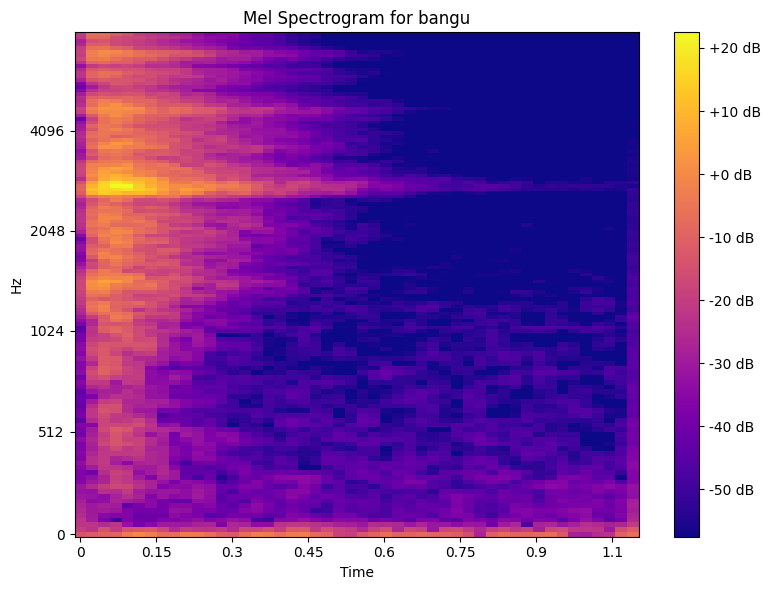

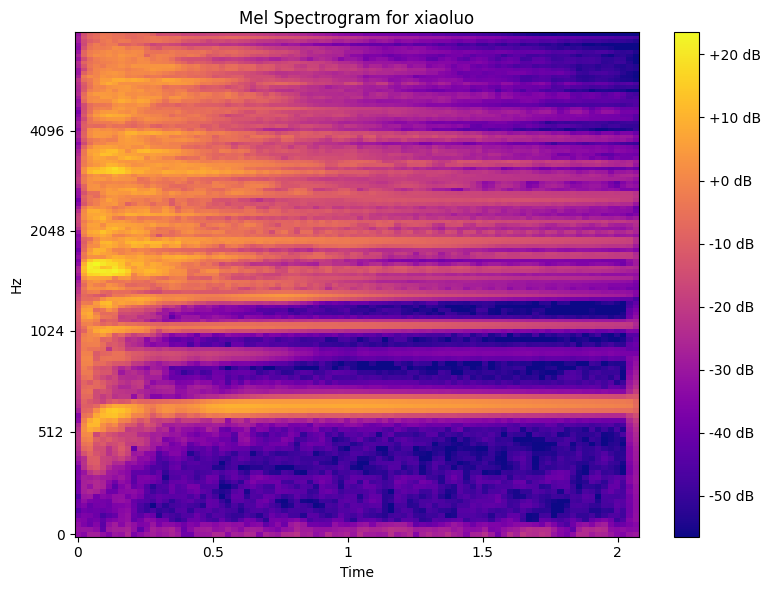

In [ ]:
#just a sense of what they look like in coloured scale
for i in range(3):
  # Display the Mel spectrogram
    plt.figure(figsize=(8, 6))
    librosa.display.specshow(features[i].T,x_axis='time', y_axis='mel', fmax = 8000,cmap='plasma')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel Spectrogram for {labels[i]}')
    plt.tight_layout()

In [ ]:
print(len(labels))

236


In [ ]:
# Directory to save the images - colored images
save_directory = '/content/drive/MyDrive/Colab Notebooks/coloured_images'

# Ensure the directory exists
os.makedirs(save_directory, exist_ok=True)

# Iterate through features and labels
for i, (spec, label) in enumerate(zip(features, labels)):
    # Close all existing figures
    plt.close('all')
    # Plot the mel spectrogram
    plt.figure(figsize=(8, 8))
    librosa.display.specshow(features[i].T, fmax = 8000, cmap='plasma')

    # Save the image with a unique filename
    image_filename = f'{label}_{i}.png'
    image_path = os.path.join(save_directory, image_filename)
    plt.savefig(image_path)

    # Close the plot to avoid memory leaks
    plt.close()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Example string labels
string_labels = ["daluo", "bangu", "xiaoluo", "naobo"]

# Initialize the label encoder
label_encoder = LabelEncoder()

print("y",y)
print("y shape:", y.shape)
# Fit and transform the string labels to numerical labels
y_numerical_labels = label_encoder.fit_transform(y)

# Print the result
print("String labels:", string_labels)
print("Numerical labels:", y_numerical_labels)


# Access the mapping between original string labels and numerical labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:", label_mapping)

print("Numerical Labels Shape:",y_numerical_labels.shape)

y ['daluo' 'bangu' 'xiaoluo' 'naobo' 'xiaoluo' 'daluo' 'bangu' 'bangu'
 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu'
 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu'
 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu'
 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu'
 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu'
 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu' 'bangu'
 'bangu' 'bangu' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo'
 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo'
 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo'
 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo'
 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'daluo'
 'daluo' 'daluo' 'daluo' 'daluo' 'daluo' 'naobo' 'naobo' 'naobo' 'naobo'
 'naobo' 'naobo' 'naobo' 'naobo' 'naobo' 'naobo' 'nao

In [ ]:
image_dir = '/content/drive/MyDrive/Colab Notebooks/coloured_images'
image_files = os.listdir(image_dir)
print(len(image_files))

236


In [ ]:
#process the image data to the size that is compatible with pretrained model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input

def load_and_preprocess_image(file_path):
    img = image.load_img(os.path.join(image_dir, file_path), target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array

all_preprocessed_images = []
# Iterate through each image file
for file_path in image_files:
    # Load and preprocess the image
    img_array = load_and_preprocess_image(file_path)

    # Append the preprocessed image to the list
    all_preprocessed_images.append(img_array)


# Convert the list to a NumPy array
images_array = np.array(all_preprocessed_images)

# Display the shape of the resulting array
print("Shape of preprocessed colored images array:", images_array.shape)

Shape of preprocessed colored images array: (236, 224, 224, 3)


In [ ]:
from sklearn.model_selection import train_test_split

# load features (X) and labels (y) from the previous steps

# Split the data into training (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(images_array, y_numerical_labels, test_size=0.3, random_state=42)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(images_array_coloured, y_numerical_labels, test_size=0.3, random_state=42)
# Print the sizes of the resulting sets
print(f"Training set size: {len(X_train)} samples")
# print(f"Validation set size: {len(X_val)} samples")
print(f"Test set size: {len(X_test)} samples")
print(len(images_array))

Training set size: 165 samples
Test set size: 71 samples
236


In [ ]:
#load the pretrained model
from tensorflow.keras.applications import DenseNet121

# load the pretrained model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
def extract_features(model, data):
    features = model.predict(data)
    return features

#not sure if we need this
from sklearn.preprocessing import StandardScaler

def normalize_features(features):
    scaler = StandardScaler()
    features_normalized = scaler.fit_transform(features)
    return features_normalized

In [ ]:
#Use the pre-trained DenseNet121 model to extract features from mel spectrogram images
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import Model

features_train = extract_features(base_model, X_train)
features_test = extract_features(base_model, X_test)

3/3 [==============================] - 14s 5s/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

# Define the CNN model
model = Sequential([
    Flatten(input_shape=features_train.shape[1:]),  # Flatten the extracted features
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
model.fit(features_train, y_train, epochs=20, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(features_test, y_test)
print(f"Test Accuracy: {test_acc}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 256)               12845312  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 516       
                                                                 
Total params: 12878724 (49.13 MB)
Trainable params: 1287

3/3 [==============================] - 0s 64ms/step
Accuracy: 0.971830985915493


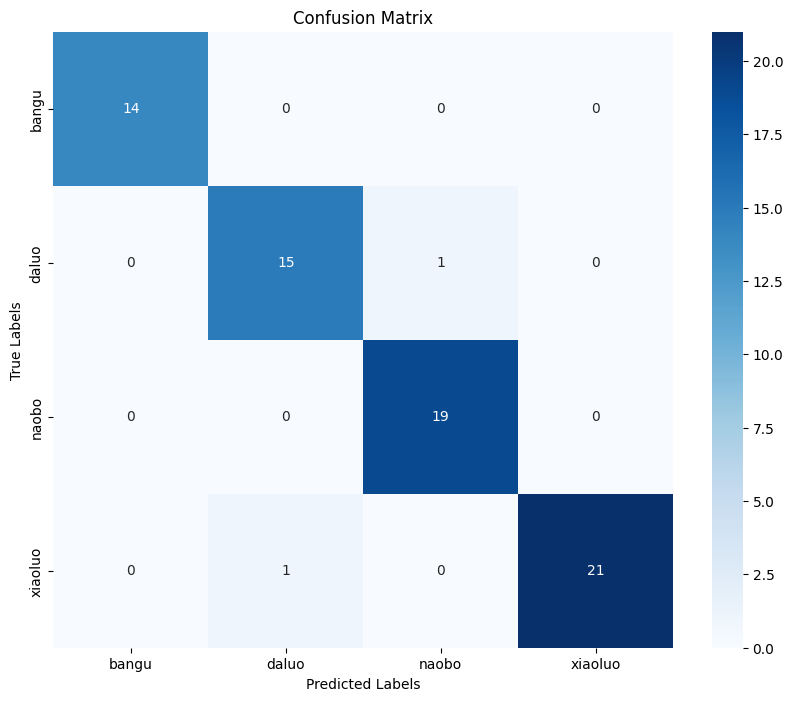

In [ ]:
#here just using model.predict to see the predicted labels
from sklearn.metrics import accuracy_score, confusion_matrix
predictions = model.predict(features_test)
predicted_labels = np.argmax(predictions, axis=1)

accuracy = accuracy_score(y_test_c, predicted_labels)
print(f"Accuracy: {accuracy}")

#create a confusion matrix
cm = confusion_matrix(y_test_c, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()